# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


In [ ]:
cities

---

In [ ]:
print(len(lats))
print(len(lngs))

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid='+weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds =city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country =city_weather['sys']['country']
        city_date = city_weather['dt']
        #city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit='s')
       
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        pass
    
    
    
   #except:
       # print("City not found. Skipping...")
        #pass    
             
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tocantinopolis
'coord'
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | praia da vitoria
Processing Record 6 of Set 1 | mayo
Processing Record 7 of Set 1 | port lincoln
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | ulaangom
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | marsh harbour
Processing Record 13 of Set 1 | comodoro rivadavia
Processing Record 14 of Set 1 | vardo
Processing Record 15 of Set 1 | panacan
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | attawapiskat
'coord'
Processing Record 18 of Set 1 | naze
Processing Record 19 of Set 1 | taiyuan
Processing Record 20 of Set 1 | cagayan de tawi-tawi
'coord'
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of

Processing Record 42 of Set 4 | ilulissat
Processing Record 43 of Set 4 | sept-iles
Processing Record 44 of Set 4 | borovskoy
Processing Record 45 of Set 4 | padang
Processing Record 46 of Set 4 | tual
Processing Record 47 of Set 4 | narrabri
Processing Record 48 of Set 4 | westport
Processing Record 49 of Set 4 | codrington
Processing Record 0 of Set 5 | hovd
Processing Record 1 of Set 5 | rengali
Processing Record 2 of Set 5 | namatanai


KeyboardInterrupt: 

In [ ]:
city_data

In [4]:
city_weather = requests.get(city_url).json()
city_weather 


{'coord': {'lon': 152.4333, 'lat': -3.6667},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 298.47,
  'feels_like': 299.38,
  'temp_min': 298.47,
  'temp_max': 298.47,
  'pressure': 1012,
  'humidity': 89,
  'sea_level': 1012,
  'grnd_level': 1007},
 'visibility': 10000,
 'wind': {'speed': 3.12, 'deg': 264, 'gust': 4.27},
 'rain': {'1h': 1.05},
 'clouds': {'all': 99},
 'dt': 1678190272,
 'sys': {'country': 'PG', 'sunrise': 1678132612, 'sunset': 1678176385},
 'timezone': 36000,
 'id': 2090021,
 'name': 'Namatanai',
 'cod': 200}

In [5]:
city_weather['clouds']['all']

99

In [ ]:
url = 'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid='+weather_api_key
city =  'caravelas'
city_url =  url + "&q=" + city
city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
city_lat =city_weather['coord']['lat']
city_lng = city_weather['coord']['lon']
city_max_temp =city_weather['main']['temp_max']
city_humidity = city_weather['main']['humidity']
city_clouds =city_weather['clouds']
city_wind = city_weather['wind']
city_country =city_weather['sys']['country']
city_date = city_weather['dt']


In [ ]:
city_weather

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit='s')
# Show Record Count
city_data_df.count()

City          181
Lat           181
Lng           181
Max Temp      181
Humidity      181
Cloudiness    181
Wind Speed    181
Country       181
Date          181
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,300.35,79,98,5.35,KI,1678190164
1,kapaa,22.0752,-159.3190,296.14,82,0,0.45,US,1678190165
2,east london,-33.0153,27.9116,297.67,69,20,2.57,ZA,1678190165
3,praia da vitoria,38.7333,-27.0667,290.29,82,40,12.50,PT,1678189804
4,mayo,38.8876,-76.5119,279.33,72,100,4.63,US,1678190166


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,300.35,79,98,5.35,KI,1678190164
1,kapaa,22.0752,-159.3190,296.14,82,0,0.45,US,1678190165
2,east london,-33.0153,27.9116,297.67,69,20,2.57,ZA,1678190165
3,praia da vitoria,38.7333,-27.0667,290.29,82,40,12.50,PT,1678189804
4,mayo,38.8876,-76.5119,279.33,72,100,4.63,US,1678190166


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

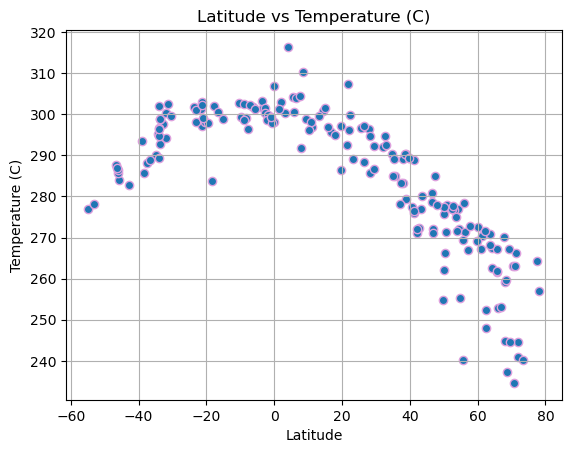

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter( city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='plum')

# Incorporate the other graph properties
plt.title('Latitude vs Temperature (C)')
plt.ylabel('Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

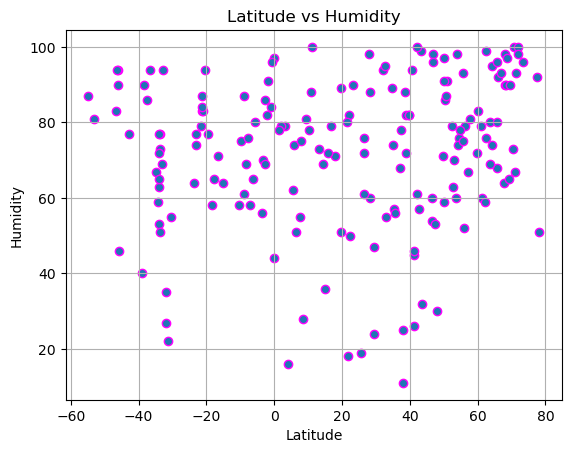

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter( city_data_df['Lat'], city_data_df['Humidity'], edgecolor='fuchsia')

# Incorporate the other graph properties
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

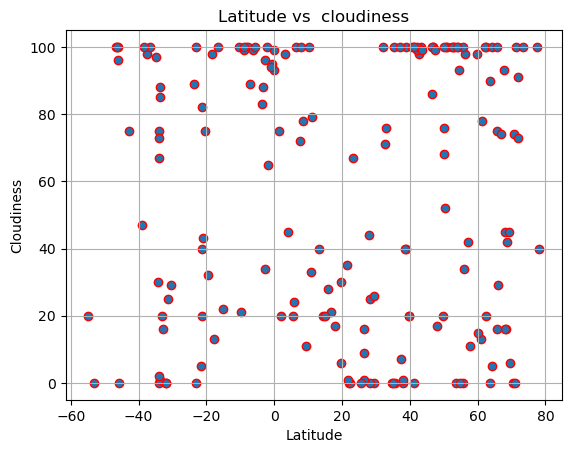

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='red')

# Incorporate the other graph properties
plt.title('Latitude vs  cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

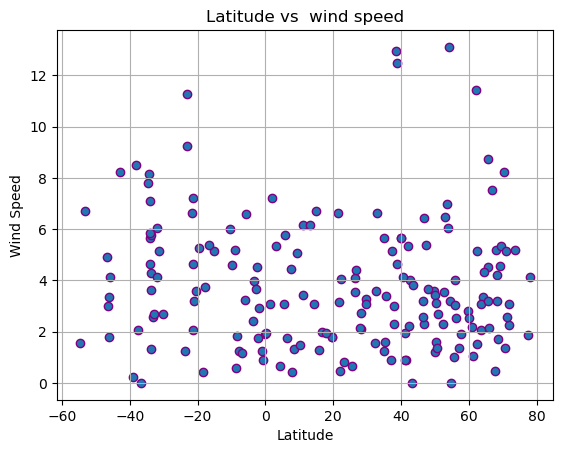

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='purple')

# Incorporate the other graph properties
plt.title('Latitude vs  wind speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    
    

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,300.35,79,98,5.35,KI,1678190164
1,kapaa,22.0752,-159.3190,296.14,82,0,0.45,US,1678190165
3,praia da vitoria,38.7333,-27.0667,290.29,82,40,12.50,PT,1678189804
4,mayo,38.8876,-76.5119,279.33,72,100,4.63,US,1678190166
6,chokurdakh,70.6333,147.9167,234.64,100,74,1.37,RU,1678189669


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]
#southern_hemi_df=southern_hemi_df.reset_index(drop =True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,east london,-33.0153,27.9116,297.67,69,20,2.57,ZA,1678190165
5,port lincoln,-34.7333,135.8667,290.15,67,97,7.80,AU,1678190166
11,comodoro rivadavia,-45.8667,-67.5000,284.07,46,0,4.12,AR,1678190169
14,cape town,-33.9258,18.4232,302.10,53,0,5.66,ZA,1678189881
17,ushuaia,-54.8000,-68.3000,276.94,87,20,1.54,AR,1678190172


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8029953022631168


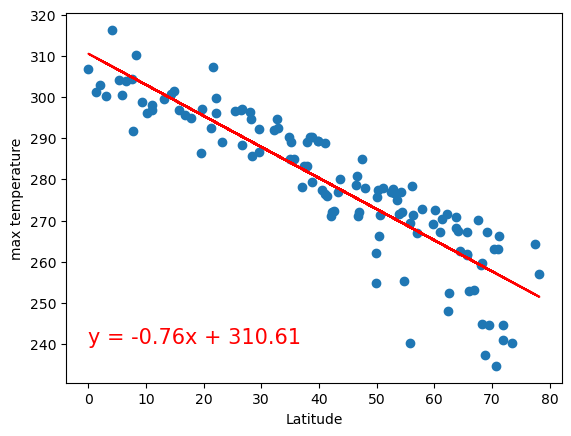

In [47]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'max temperature', (0,240))

The r-value is: 0.5190009439127499


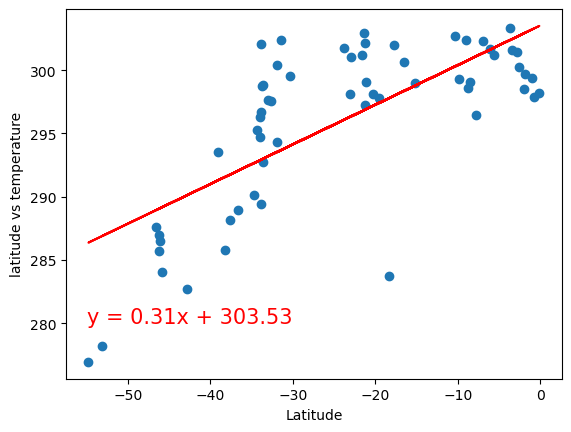

In [39]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'latitude vs temperature', (-55, 280))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09679820219521272


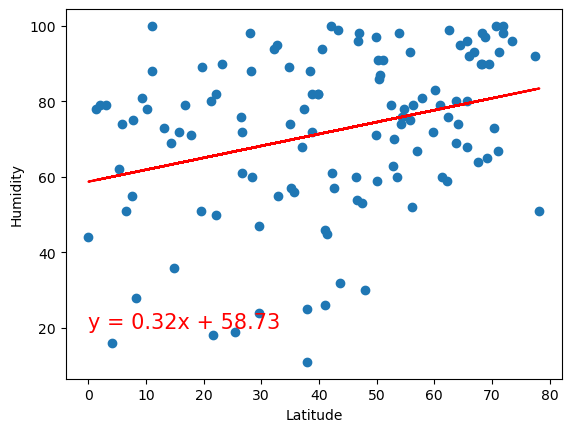

In [48]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Humidity', (0,20))

The r-value is: 0.006137133023255766


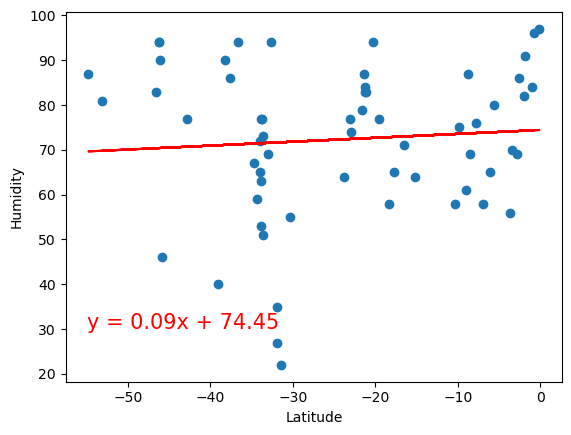

In [49]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Humidity', (-55,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.021305612694154222


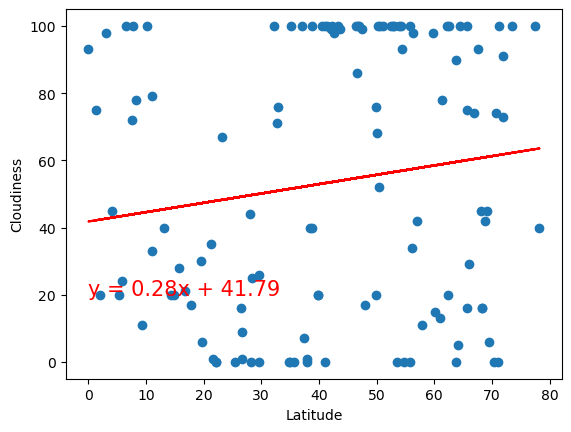

In [50]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Cloudiness', (0,20))

The r-value is: 0.09441693077953751


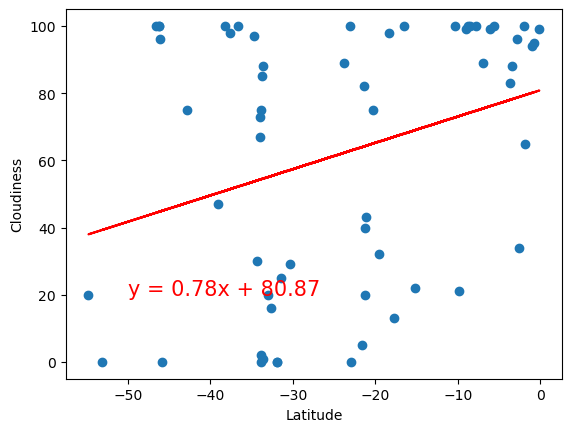

In [52]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Cloudiness', (-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0055701387904421185


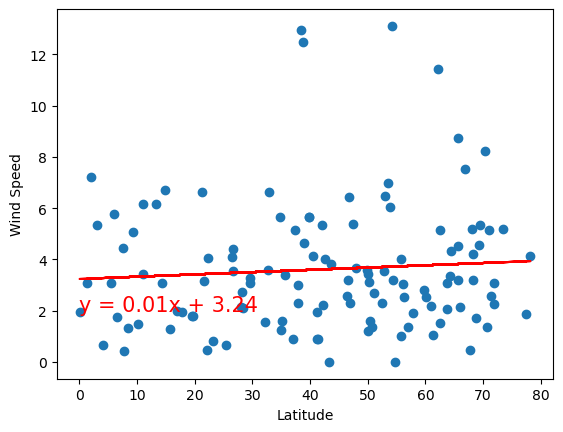

In [54]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Wind Speed', (0,2))

The r-value is: 0.039614467588582426


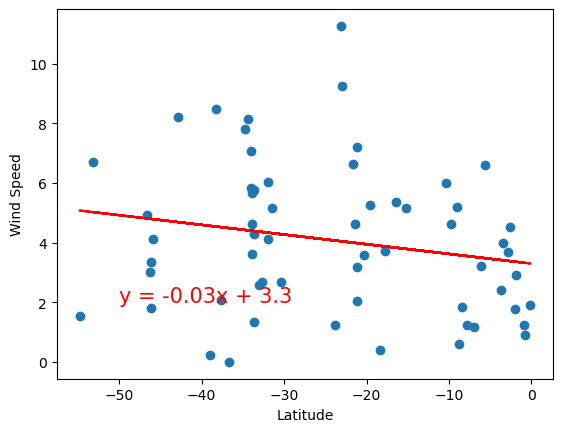

In [56]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Wind Speed', (-50,2))

**Discussion about the linear relationship:** YOUR RESPONSE HERE